In [1]:
#Importing required packages
import pandas as pd
import csv
import re
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading .csv file to Pandas dataframe
ad_food_effects= pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')

In [3]:
#Exploring the information of the data
ad_food_effects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90786 entries, 0 to 90785
Data columns (total 12 columns):
RA_Report #                        90786 non-null int64
RA_CAERS Created Date              90786 non-null object
AEC_Event Start Date               53653 non-null object
PRI_Product Role                   90786 non-null object
PRI_Reported Brand/Product Name    90786 non-null object
PRI_FDA Industry Code              90786 non-null int64
PRI_FDA Industry Name              90786 non-null object
CI_Age at Adverse Event            52926 non-null float64
CI_Age Unit                        90786 non-null object
CI_Gender                          90786 non-null object
AEC_One Row Outcomes               90786 non-null object
SYM_One Row Coded Symptoms         90781 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 8.3+ MB


In [4]:
#Renaming the column names
ad_food_effects.columns= ['Report #', 'Created Date', 'Start Date', 'Product Role', 'Product Brand/Name', 'Industry Code', 'Industry Name', 'Age', 'Age Unit', 'Gender', 'Outcomes', 'Symptoms']

In [5]:
#Exploring the duplicates
ad_food_effects[ad_food_effects.duplicated(['Report #', 'Product Brand/Name'], keep=False)]

,Report #,Created Date,Start Date,Product Role,Product Brand/Name,Industry Code,Industry Name,Age,Age Unit,Gender,Outcomes,Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
243,65973,1/22/2004,NaN,Suspect,PREMIER PIGMENTS PERMANENT TATTOO PIGMENTS: RO...,53,Cosmetics,51.0,Year(s),Female,NON-SERIOUS INJURIES/ ILLNESS,"BLISTER, SWELLING FACE, CHEILITIS, PRURITUS, H..."
244,65973,1/22/2004,NaN,Suspect,PREMIER PIGMENTS PERMANENT TATTOO PIGMENTS: RO...,53,Cosmetics,51.0,Year(s),Female,NON-SERIOUS INJURIES/ ILLNESS,"SWELLING FACE, CHEILITIS, BLISTER, PRURITUS, H..."
281,66120,1/28/2004,NaN,Suspect,CRAB OMELET,16,Fishery/Seafood Prod,NaN,Not Available,Not Available,"NON-SERIOUS INJURIES/ ILLNESS, VISITED AN ER","FEELING ABNORMAL, AMNESIA, ABDOMINAL PAIN, DIA..."
282,66120,1/28/2004,NaN,Suspect,CRAB OMELET,16,Fishery/Seafood Prod,NaN,Not Available,Not Available,"NON-SERIOUS INJURIES/ ILLNESS, VISITED AN ER","FEELING ABNORMAL, AMNESIA, VOMITING, ABDOMINAL..."
299,66157,1/28/2004,7/17/2003,Suspect,KRAFT ZESTY ITALIAN,27,Dressing/Condiment,NaN,Not Available,Female,NON-SERIOUS INJURIES/ ILLNESS,"FEELING ABNORMAL, BALANCE DISORDER, DIZZINESS,..."
300,66157,1/28/2004,7/17/2003,Suspect,KRAFT ZESTY ITALIAN,27,Dressing/Condiment,NaN,Not Available,Female,NON-SERIOUS INJURIES/ ILLNESS,"FEELING ABNORMAL, DIZZINESS, NAUSEA, ABDOMINAL..."
586,67149,3/5/2004,1/31/2004,Suspect,ENZYMATIC THERAPY EPHEDRA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Male,NON-SERIOUS INJURIES/ ILLNESS,"EMERGENCY CARE EXAMINATION, HEART RATE INCREAS..."
587,67149,3/5/2004,1/31/2004,Suspect,ENZYMATIC THERAPY EPHEDRA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,Not Available,Male,NON-SERIOUS INJURIES/ ILLNESS,"EMERGENCY CARE EXAMINATION, HEART RATE INCREAS..."


In [6]:
#Dropping the duplicates
ad_food_effects=ad_food_effects.drop_duplicates(subset=['Report #', 'Product Brand/Name'], keep='first')

In [7]:
#Dropping few rows without symptoms of the suspect
ad_food_effects=ad_food_effects.drop([4598, 6171, 18406, 39364, 48914])

In [8]:
#Dropping the NaN's in Age column
ad_food_effects=ad_food_effects.dropna(subset=['Age'])

In [9]:
#Extracting product name(toddler) and filling missing values
toddler= ad_food_effects[ad_food_effects['Product Brand/Name'].str.contains("(?:\s|^)TODDLER(?:\s|$)")][['Age']].fillna(18)
#Assigning toddler to the original dataframe
ad_food_effects.loc[ad_food_effects['Product Brand/Name'].str.contains("(?:\s|^)TODDLER(?:\s|$)"), 'Age']=toddler

In [10]:
#Adding Age Unit to the above filled values
toddler_df= ad_food_effects.loc[ad_food_effects['Product Brand/Name'].str.contains("(?:\s|^)TODDLER(?:\s|$)")]
toddler_df.loc[toddler_df['Age Unit']=='Not Available', 'Age Unit']= 'Month(s)'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
#Extracting product name(other baby products) and filling missing values
baby= ad_food_effects[ad_food_effects['Industry Code']==40][['Age']].fillna(12)
#Assigning toddler to the original dataframe
ad_food_effects.loc[ad_food_effects['Industry Code']==40, 'Age']=baby

In [12]:
#Correcting Outliers of Age 736 months to 61 years
ad_food_effects.loc[ad_food_effects['Report #']==109769, 'Age']=61
ad_food_effects.loc[ad_food_effects['Report #']==109769, 'Age Unit']='Year(s)'

In [13]:
#Correcting Outliers of Age 112 years to 12 years
ad_food_effects.loc[ad_food_effects['Report #']==103361, 'Age']=12

In [14]:
#Correcting Outliers of Age 250 years to 25 years
ad_food_effects.loc[ad_food_effects['Report #']==110300, 'Age']=25

In [15]:
#Correcting Outliers of Age 155 years to 55 years
ad_food_effects.loc[ad_food_effects['Report #']==175186, 'Age']=55

In [16]:
#Correcting Outliers of Age 151 years to 51 years
ad_food_effects.loc[ad_food_effects['Report #']==178266, 'Age']=51

In [17]:
#Correcting Outliers of Age 167 years to 67 years
ad_food_effects.loc[ad_food_effects['Report #']==182151, 'Age']=67

In [18]:
#Correcting Outliers of Age 156 years to 56 years
ad_food_effects.loc[ad_food_effects['Report #']==197010, 'Age']=56

In [19]:
#Correcting Outliers of Age 115 years to 15 years
ad_food_effects.loc[ad_food_effects['Report #']==193984, 'Age']=15

In [20]:
#Correcting Outliers of Age 76 Decades to years
ad_food_effects.loc[ad_food_effects['Report #']==71436, 'Age Unit']= 'Year(s)'

In [21]:
ad_food_effects.head()

,Report #,Created Date,Start Date,Product Role,Product Brand/Name,Industry Code,Industry Name,Age,Age Unit,Gender,Outcomes,Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
9,65354,1/2/2004,NaN,Suspect,YOHIMBE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,Year(s),Male,REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.,BLOOD PRESSURE INCREASED
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Year(s),Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH"


#### Inferential Statistics

##### Is the Age distribution Normal?

In [22]:
#Converting Decades into Years
decades_age= ad_food_effects.loc[ad_food_effects['Age Unit']=='Decade(s)']
decades_age.Age*=10
ad_food_effects.loc[ad_food_effects['Age Unit']=='Decade(s)']= decades_age
ad_food_effects.loc[ad_food_effects['Age Unit']=='Decade(s)', 'Age Unit']='Year(s)'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
#Converting Decades into Years
months_age= ad_food_effects.loc[ad_food_effects['Age Unit']=='Month(s)']
months_age.Age/=12
ad_food_effects.loc[ad_food_effects['Age Unit']=='Month(s)']= months_age
ad_food_effects.loc[ad_food_effects['Age Unit']=='Month(s)', 'Age Unit']='Year(s)'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
#Converting Weeks into Years
weeks_age= ad_food_effects.loc[ad_food_effects['Age Unit']=='Week(s)']
weeks_age.Age/=52.1429
ad_food_effects.loc[ad_food_effects['Age Unit']=='Week(s)']= weeks_age
ad_food_effects.loc[ad_food_effects['Age Unit']=='Week(s)', 'Age Unit']='Year(s)'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
#Converting Days into Years
days_age= ad_food_effects.loc[ad_food_effects['Age Unit']=='Day(s)']
days_age.Age/=365
ad_food_effects.loc[ad_food_effects['Age Unit']=='Day(s)']= days_age
ad_food_effects.loc[ad_food_effects['Age Unit']=='Day(s)', 'Age Unit']='Year(s)'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [26]:
#Converting Not Available unit into Years
ad_food_effects.loc[ad_food_effects['Age Unit']=='Not Available', 'Age Unit']='Year(s)'

In [27]:
age_sort= ad_food_effects.Age.sort_values()
bin_values = np.arange(start=age_sort.min(), stop=age_sort.max(), step=4)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Age Distribution')

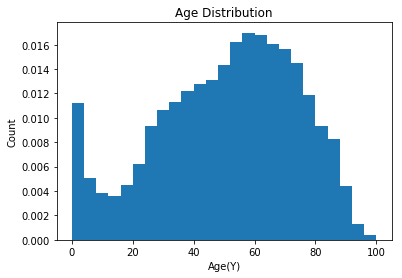

In [28]:
#Plotting the histogram:
plt.hist(age_sort,bins=bin_values,stacked=True, normed=True)
plt.xlabel('Age(Y)')
plt.ylabel('Count')
plt.title('Age Distribution')

##### Is there a difference between Female and Male Mean Age? 

In [29]:
#Extracting female reports
female= ad_food_effects[ad_food_effects['Gender']=='Female']
female.Age.describe()

count    35293.000000
mean        52.845285
std         21.516554
min          0.000000
25%         38.000000
50%         55.000000
75%         69.000000
max        104.000000
Name: Age, dtype: float64

In [30]:
#Extracting male reports
male= ad_food_effects[ad_food_effects['Gender']=='Male']
male.Age.describe()

count    16306.000000
mean        46.211546
std         24.860531
min          0.000000
25%         27.000000
50%         48.000000
75%         67.000000
max        104.000000
Name: Age, dtype: float64

In [31]:
#Difference of means:
difference_of_means= np.mean(female.Age)-np.mean(male.Age)
difference_of_means

6.633738839701813

In [32]:
#computing two sample test:
age_concat = np.concatenate((female.Age, male.Age))
age_bs_replicates= np.empty(10000)
for i in range (10000):
    age_perm= np.random.choice(age_concat, size= len(age_concat))
    age_bs_replicates[i]= np.mean(age_perm[:len(female.Age)]) - np.mean(age_perm[len(female.Age):])

In [33]:
#Calculating p-value
p=np.sum(age_bs_replicates>=difference_of_means)/10000
p

0.0

##### The above p-value suggests that there is a significant difference between the Female and Male age reports.

##### Is there a significant difference between Female and Male serious reports?

In [34]:
df=ad_food_effects

In [35]:
from pandas import Series
#Extract multiple outcomes into separate rows
s= df['Outcomes'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Outcomes'

In [36]:
#Joining new outcome column to the dataframe
del df['Outcomes']
df= df.join(s)

In [37]:
df.head()

,Report #,Created Date,Start Date,Product Role,Product Brand/Name,Industry Code,Industry Name,Age,Age Unit,Gender,Symptoms,Outcomes
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.00,Year(s),Female,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",VISITED AN ER
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.00,Year(s),Female,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",VISITED A HEALTH CARE PROVIDER
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.00,Year(s),Female,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.00,Year(s),Female,"SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...",HOSPITALIZATION
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,0.25,Year(s),Not Available,"GASTROINTESTINAL DISORDER, VOMITING",NON-SERIOUS INJURIES/ ILLNESS


In [38]:
df['Outcomes'].value_counts()

OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)      17331
NON-SERIOUS INJURIES/ ILLNESS                  9009
VISITED A HEALTH CARE PROVIDER                 8590
 OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)      7754
HOSPITALIZATION                                7164
 HOSPITALIZATION                               5800
 VISITED AN ER                                 4971
VISITED AN ER                                  4375
 VISITED A HEALTH CARE PROVIDER                3594
 LIFE THREATENING                              2079
LIFE THREATENING                               1941
 REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.     1604
SERIOUS INJURIES/ ILLNESS                      1508
DISABILITY                                     1507
 SERIOUS INJURIES/ ILLNESS                     1372
 NON-SERIOUS INJURIES/ ILLNESS                 1257
 DISABILITY                                     825
REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.       748
DEATH                                           669
 DEATH      

In [39]:
#Extracting serious outcomes 
serious1= df[df.Outcomes=='OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)']
serious2= df[df.Outcomes=='SERIOUS INJURIES/ ILLNESS']

In [40]:
#Joining serious and other serious outcomes
serious= pd.concat([serious1, serious2], axis=0)

In [41]:
# number of serious outcomes for female reports
serious_F= sum(serious.Gender=='Female')
serious_F

13711

In [42]:
# Total number of female reports
total_F= sum(ad_food_effects['Gender']=='Female')
total_F

35293

In [43]:
#Proportion of serious female
prop_serious_F= (serious_F/total_F)
prop_serious_F

0.388490635536792

In [44]:
# number of serious outcomes for male reports
serious_M= sum(serious.Gender=='Male')
serious_M

4803

In [45]:
# Total number of female reports
total_M= sum(ad_food_effects['Gender']=='Male')
total_M

16306

In [46]:
#Proportion of serious female
prop_serious_M= (serious_M/total_M)
prop_serious_M

0.2945541518459463

In [47]:
#Difference in proportion of serious outcomes
diff_in_serious= prop_serious_F - prop_serious_M
diff_in_serious

0.09393648369084567

##### Calculating Standard of Error, Margin of Error, and Confidence Interval

In [48]:
#Standard of Error, SE= np.sqrt((p_hat-(1-p_hat))/n)
SE= np.sqrt((prop_serious_F*(1-prop_serious_F)/total_F)+ (prop_serious_M*(1-prop_serious_M))/total_M)
SE

0.004412995029379812

In [49]:
#Margin of Error, ME
ME= SE*2
ME

0.008825990058759624

In [50]:
#Confidence interval, CI
CI= [diff_in_serious - ME, diff_in_serious + ME]
CI

[0.08511049363208605, 0.1027624737496053]

##### Calculating p-value

In [51]:
#Computing male and female serious reports
M = serious['Gender']=='Male'
F = serious['Gender']=='Female'

In [52]:
diff_in_mean= np.mean(F)-np.mean(M)
diff_in_mean

0.47284887732894526

In [53]:
#Computing permutation samples
serious_concat= np.concatenate((F, M))
serious_reps= np.empty(10000)
for i in range (10000):
    serious_perm= np.random.choice(serious_concat, size=len(serious_concat))
    serious_reps[i]= np.mean(serious_perm[:len(F)])-np.mean(serious_perm[len(F):])

In [54]:
#Computing pvalue
p= np.sum(serious_reps>=diff_in_mean)/len(serious_reps)
p

0.0

In [55]:
#T-test Statistic
from scipy import stats
stats.ttest_ind(F, M)

Ttest_indResult(statistic=104.18167762880711, pvalue=0.0)

##### The above p-value is the evidence for the significant difference between Male and Female serious reports.

##### Serious reports Analysis on Age group 

In [56]:
#Computing Age distribution
age_sort_s= serious.Age.sort_values()
bin_values1 = np.arange(start=age_sort_s.min(), stop=age_sort_s.max(), step=4)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Serious reports Age Distribution')

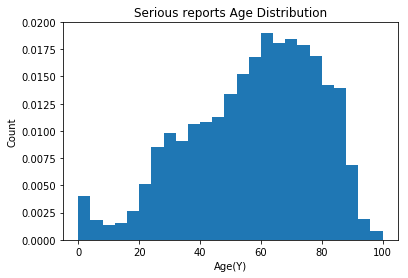

In [57]:
#Plotting the histogram:
plt.hist(age_sort_s,bins=bin_values1,stacked=True, normed=True)
plt.xlabel('Age(Y)')
plt.ylabel('Count')
plt.title('Serious reports Age Distribution')

##### The above visualization shows that Age > 50 have more serious reports. 

In [58]:
# number of serious outcomes for age >= 50
serious_50= sum(serious.Age>= 50)
serious_50

12610

In [59]:
# Total number of reports of age > 50
total_50= sum(ad_food_effects['Age']>=50)
total_50

29533

In [60]:
#Proportion of serious reports of age >=50
prop_serious_50= (serious_50/total_50)
prop_serious_50

0.4269799884874547

In [61]:
# number of serious outcomes for age < 50
serious_49= sum(serious.Age < 50)
serious_49

6229

In [62]:
# Total number of reports of age < 50
total_49= sum(ad_food_effects['Age'] < 50)
total_49

23372

In [63]:
#Proportion of serious female
prop_serious_49= (serious_49/total_49)
prop_serious_49

0.26651548861886015

##### Calculating p-value

In [64]:
#Computing serious reports for age <50 and >=50
age50 = serious['Age']>=50
age49 = serious['Age']<50

In [65]:
diff_in_mean_age= np.mean(age50)-np.mean(age49)
diff_in_mean_age

0.3387122458729232

In [111]:
#T-test Statistic
from scipy import stats
stats.ttest_ind(f_serious,m_serious)

Ttest_indResult(statistic=21.01172572535338, pvalue=6.935631932850038e-98)

In [66]:
#Computing permutation samples
serious_age_concat= np.concatenate((age50,age49 ))
serious_age_reps= np.empty(10000)
for i in range (10000):
    serious_age_perm= np.random.choice(serious_age_concat, size=len(serious_age_concat))
    serious_age_reps[i]= np.mean(serious_age_perm[:len(age50)])-np.mean(serious_age_perm[len(age50):])

In [67]:
#Computing pvalue
p= np.sum(serious_age_reps>=diff_in_mean_age)/len(serious_age_reps)
p

0.0

In [68]:
#T-test Statistic
from scipy import stats
stats.ttest_ind(age50, age49)

Ttest_indResult(statistic=69.87542048790854, pvalue=0.0)

##### The above p-value is the evidence for the significant difference between serious reports for age group of age less than 50 and age greater than 50